La visualizzazione presentata in questo documento cerca di rispondere alla domanda: "come varia, sulla base della presenza o assenza di luce naturale, lo score relativo al **benessere mentale** post-operatorio nei due generi?".


#PROJECT DEVELOPED BY 
###CERABOLINI AURORA
###STRADA CORINNA 

We would like to answer to the following research question:

**Is the score regarding the post-operatory mental well-being of the patients dependent on the variable "Natural light"?**

We decided to split the observations by gender.

For a start, we imported all the libraries used in this notebook.

In [16]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import statistics, math
%matplotlib inline

Then, we read the .csv files

In [17]:
data = pd.read_csv('compitino_dataviz_2021_2022.csv')
data

,nome_modulistica,score_preop,score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,SF12 PhysicalScore,27.60,37.40,poco nuvoloso,F,70,20.0,69.0,False,True
1,SF12 MentalScore,54.36,58.46,poco nuvoloso,F,70,20.0,69.0,False,True
2,SF12 PhysicalScore,28.15,38.25,poco nuvoloso,M,69,18.0,65.0,False,True
3,SF12 MentalScore,57.02,64.62,poco nuvoloso,M,69,18.0,65.0,False,True
4,SF12 PhysicalScore,31.57,55.67,poco nuvoloso,M,70,23.0,74.0,False,True
...,...,...,...,...,...,...,...,...,...,...
2105,SF12 MentalScore,57.54,62.34,nebbia al mattino,M,70,20.0,71.0,True,True
2106,SF12 PhysicalScore,32.20,37.10,nebbia al mattino,F,56,20.0,71.0,True,True
2107,SF12 MentalScore,48.84,50.94,nebbia al mattino,F,56,20.0,71.0,True,True
2108,SF12 PhysicalScore,36.47,43.47,sereno,M,69,23.0,55.0,False,True


We generated a dataset called **data_MS**.

We selected the instances where the attribute  'nome_modulistica' has value equal to 'SF12 MentalScore'. 

In this way, we selected the scores regarding the mental health of the patients.

In [18]:
data_MS=data[data["nome_modulistica"]=="SF12 MentalScore"]
data_MS = data_MS.reset_index(drop=True)
data_MS

,nome_modulistica,score_preop,score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,SF12 MentalScore,54.36,58.46,poco nuvoloso,F,70,20.0,69.0,False,True
1,SF12 MentalScore,57.02,64.62,poco nuvoloso,M,69,18.0,65.0,False,True
2,SF12 MentalScore,60.27,58.47,poco nuvoloso,M,70,23.0,74.0,False,True
3,SF12 MentalScore,50.17,54.97,poco nuvoloso,F,66,15.0,72.0,False,True
4,SF12 MentalScore,54.14,55.74,nebbia al mattino,F,73,18.0,75.0,False,True
...,...,...,...,...,...,...,...,...,...,...
1050,SF12 MentalScore,37.40,34.50,poco nuvoloso,F,57,23.0,61.0,True,True
1051,SF12 MentalScore,33.93,59.13,sereno,F,58,21.0,71.0,True,True
1052,SF12 MentalScore,57.54,62.34,nebbia al mattino,M,70,20.0,71.0,True,True
1053,SF12 MentalScore,48.84,50.94,nebbia al mattino,F,56,20.0,71.0,True,True


In [19]:
sns.set_style("whitegrid")

From the dataset **data_MS**, we generated other four datasets, which are called:

- data_F_True, in which the variable "sesso" (sex) in equal to F (which means that the patient is female) and the variable "natural_light" is True (which means that when the scores where detected, it was daytime).

- data_F_False: "sesso" = F and "natural_light" = False (when the scores where detected, it was nighttime).

- data_M_True: "sesso" = M and  "natural_light" =True

- data_M_False: "sesso" = M and "natural_light" = False


In [20]:
data_F=data_MS[data_MS["sesso"]=="F"] 
data_F_True=data_F[data_F["natural_light"]==True]
data_F_True = data_F_True.reset_index(drop=True)
data_F_True.head()

,nome_modulistica,score_preop,score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,SF12 MentalScore,54.36,58.46,poco nuvoloso,F,70,20.0,69.0,False,True
1,SF12 MentalScore,50.17,54.97,poco nuvoloso,F,66,15.0,72.0,False,True
2,SF12 MentalScore,54.14,55.74,nebbia al mattino,F,73,18.0,75.0,False,True
3,SF12 MentalScore,33.57,54.47,pioggia e schiarite,F,67,17.0,83.0,False,True
4,SF12 MentalScore,54.78,54.58,sereno,F,53,16.0,70.0,False,True


In [21]:
data_F=data_MS[data_MS["sesso"]=="F"] 
data_F_False=data_F[data_F["natural_light"]==False]
data_F_False = data_F_False.reset_index(drop=True)
data_F_False.head()

,nome_modulistica,score_preop,score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,SF12 MentalScore,32.39,29.79,poco nuvoloso,F,65,20.0,69.0,False,False
1,SF12 MentalScore,59.51,41.61,pioggia debole,F,70,2.0,97.0,False,False
2,SF12 MentalScore,37.48,61.28,pioggia e schiarite,F,81,7.0,96.0,False,False
3,SF12 MentalScore,54.35,59.05,temporale e schiarite,F,74,11.0,89.0,False,False
4,SF12 MentalScore,49.59,29.99,nebbia al mattino,F,69,3.0,98.0,False,False


In [22]:
data_M=data_MS[data_MS["sesso"]=="M"] 
data_M_True=data_M[data_M["natural_light"]==True]
data_M_True = data_M_True.reset_index(drop=True)
data_M_True.head()

,nome_modulistica,score_preop,score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,SF12 MentalScore,57.02,64.62,poco nuvoloso,M,69,18.0,65.0,False,True
1,SF12 MentalScore,60.27,58.47,poco nuvoloso,M,70,23.0,74.0,False,True
2,SF12 MentalScore,50.13,58.23,sereno,M,68,20.0,40.0,False,True
3,SF12 MentalScore,28.39,45.59,sereno,M,78,17.0,63.0,False,True
4,SF12 MentalScore,34.14,62.84,poco nuvoloso,M,81,26.0,59.0,True,True


In [23]:
data_M=data_MS[data_MS["sesso"]=="M"] 
data_M_False=data_M[data_M["natural_light"]==False]
data_M_False = data_M_False.reset_index(drop=True)
data_M_False.head()

,nome_modulistica,score_preop,score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,SF12 MentalScore,47.70,39.20,poco nuvoloso,M,51,4.0,83.0,False,False
1,SF12 MentalScore,41.90,51.00,poco nuvoloso,M,71,4.0,69.0,False,False
2,SF12 MentalScore,64.68,66.28,poco nuvoloso,M,81,7.0,60.0,False,False
3,SF12 MentalScore,58.55,57.05,poco nuvoloso,M,68,4.0,67.0,False,False
4,SF12 MentalScore,65.38,50.58,poco nuvoloso,M,69,5.0,60.0,False,False


Then, we generated the data visualization in order to answer to our research question.

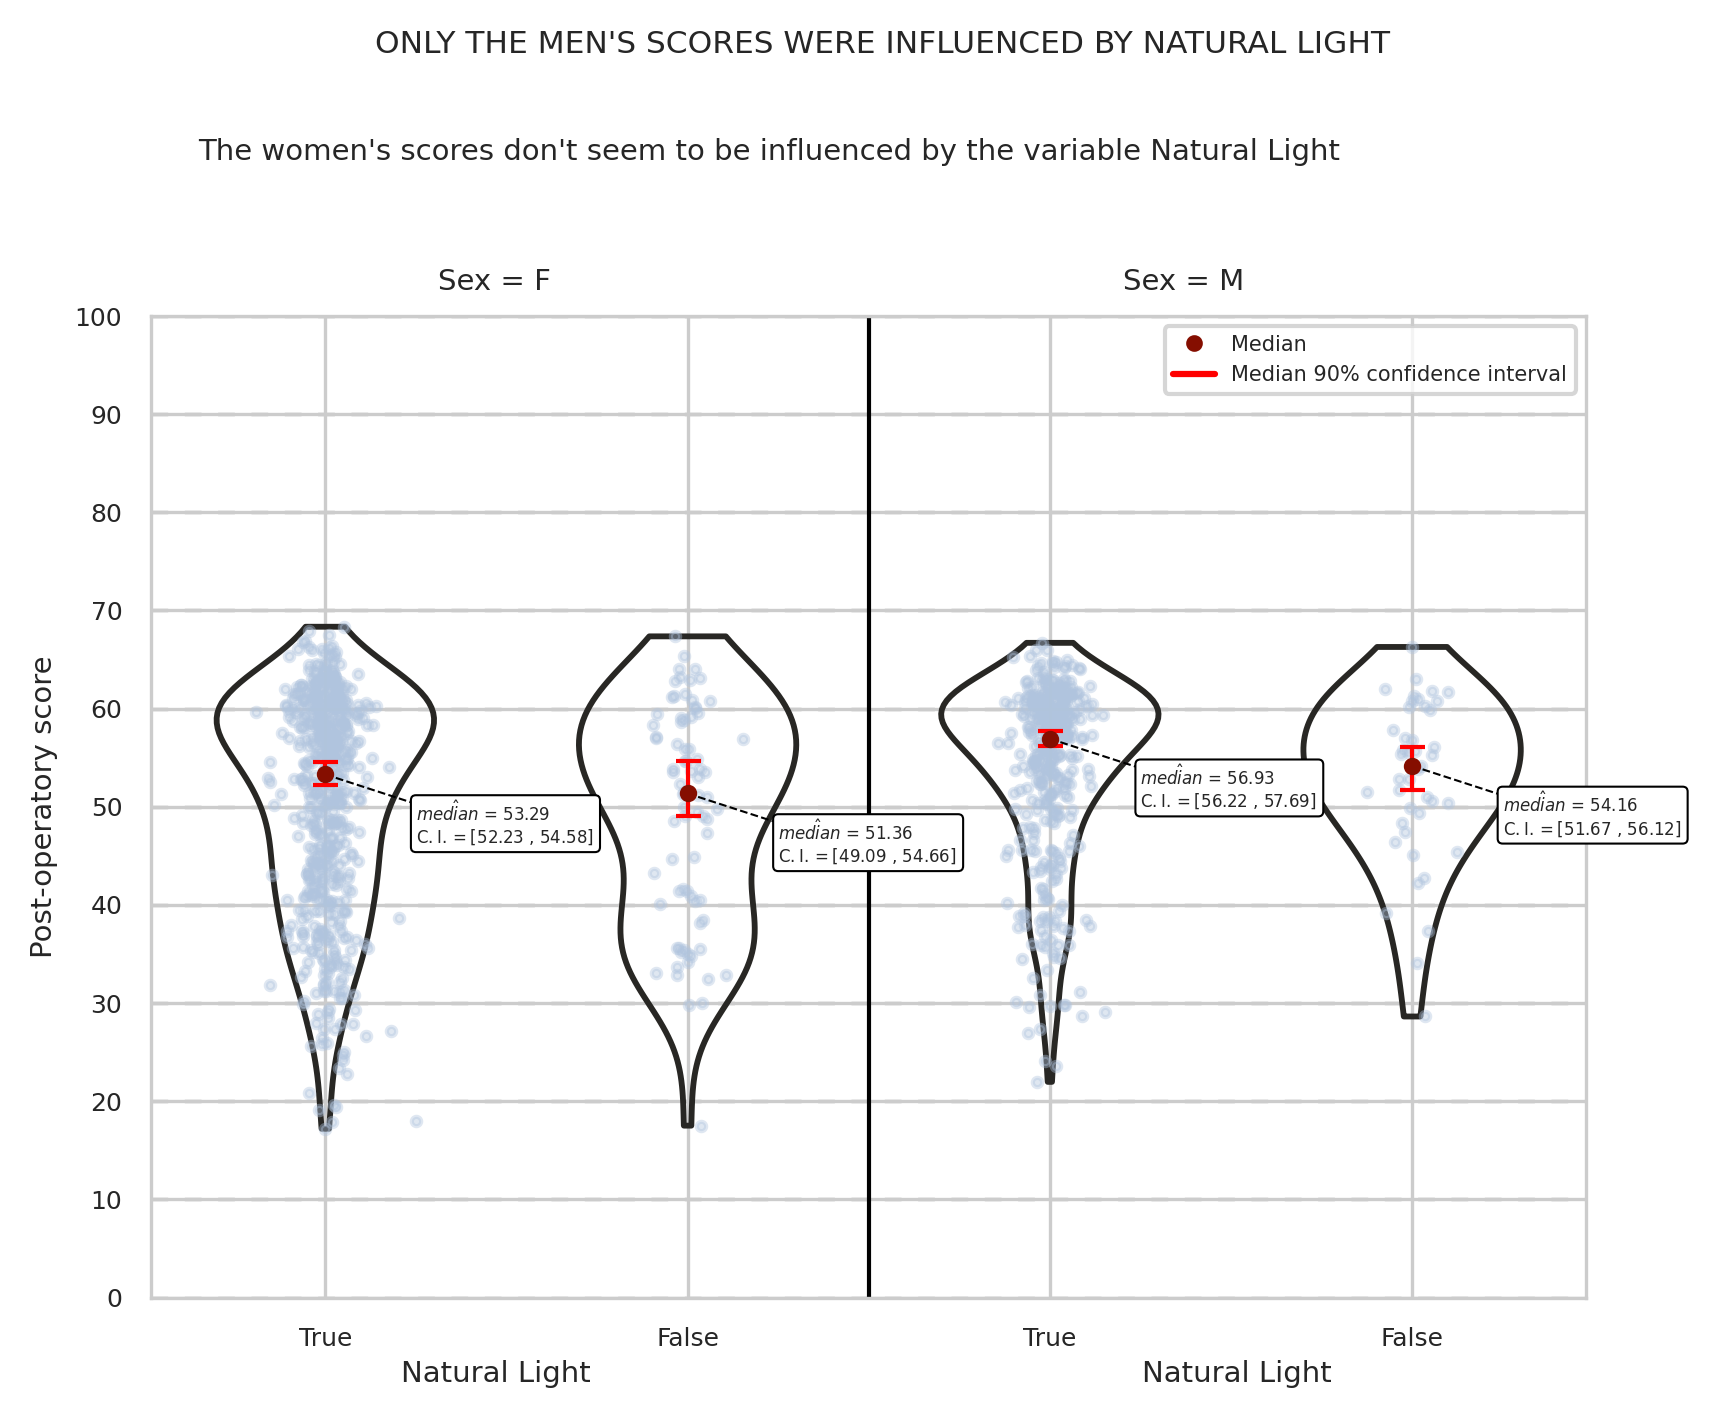

In [24]:
# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

COLOR_SCALE = ["lightsteelblue", "lightsteelblue", "lightsteelblue" , "lightsteelblue"]

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)   

data1 = data_F_True["score_postop"]
data2 = data_F_False["score_postop"]
data3 = data_M_True["score_postop"]
data4 = data_M_False["score_postop"]
y_data = list([data1, data2, data3, data4])

# Create jittered version of "x" 
jitter = 0.04
x_data = [np.array([i] * len(d), dtype=object) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

POSITIONS = [0,1,2,3]
HLINES = range(-10,110,10) #[40, 50, 60]
fig, ax = plt.subplots(figsize=(1851/300, 1300/300), dpi=300)
ax.set(ylim=(0, 100))
tick_spacing=10
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

xticklabels = ['True', 'False', 'True', 'False']
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(xticklabels)

# Some layout stuff 
# Background color
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

# Horizontal lines that are used as scale reference
for h in HLINES:
    ax.axhline(h, color="#7F7F7F", ls=(0, (5, 5)), alpha=0.8, zorder=0, lw=0.8)

# Add violins 

violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.6, 
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)


# Customize violins 
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor("#282724")
    pc.set_linewidth(1.4)
    pc.set_alpha(1)


# Add jittered dots 
for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
    ax.scatter(x, y, s = 5, color=color, alpha=0.4);

# median
medians = [y.median() for y in y_data]

# Median 90% confidence interval
ic_list=[]
len_data = len(y_data)

for i in range(len_data):
    y_data[i]=y_data[i].sort_values(ascending=True, ignore_index=True)
    factor = 1.645
    factor *= math.sqrt(len(y_data[i])) 
    lix = round(0.5*(1+len(y_data[i])-factor))
    uix = round(0.5*(1+len(y_data[i])+factor))
    ic_list.append((y_data[i][lix], y_data[i][uix]))

plt.plot([0.0, 0.0], [ic_list[0][0], ic_list[0][1]], color="red", linestyle='-', lw=1, marker='_')
plt.plot([1.0, 1.0], [ic_list[1][0], ic_list[1][1]], color="red", linestyle='-', lw=1, marker='_')
plt.plot([2.0, 2.0], [ic_list[2][0], ic_list[2][1]], color="red", linestyle='-', lw=1, marker='_')
plt.plot([3.0, 3.0], [ic_list[3][0], ic_list[3][1]], color="red", linestyle='-', lw=1, marker='_')
  
##    

for i, median in enumerate(medians):
    # Add dot representing the median
    ax.scatter(i, median, s=10, color=RED_DARK, zorder=3)
    
    # Add line conecting median value and its label
    ax.plot([i, i + 0.25], [median, median - 3], ls="--", lw=0.5, color="black", zorder=2)
    
    # Add median value label.
    ax.text(
        i + 0.25,
        median - 5,
        r"$\hat{median}}=$" + " = " + str(round(median, 2)) + "\n" + r"${\rm{C.I.}} = $" + 
        "[" + str(round(ic_list[i][0], 2)) +" , "+ str(round(ic_list[i][1], 2))+"] " ,
        fontsize=4,
        va="center",
        bbox = dict(
            facecolor="white",
            edgecolor="black",
            boxstyle="round",
            pad=0.3,
            lw=0.5
        ),
        zorder=10 # to make sure the line is on top
    )


fig.suptitle("ONLY THE MEN'S SCORES WERE INFLUENCED BY NATURAL LIGHT", x=0.52, y=1.1,fontsize=7.5)

fig.text(0.15, 1.00,"The women's scores don't seem to be influenced by the variable Natural Light ", fontsize=7); #add text for subtitle

fig.text(0.28, 0.9,'Sex = F', fontsize=7); #add text for subtitle
fig.text(0.65, 0.9,'Sex = M', fontsize=7); #add text for subtitle

fig.text(0.26, 0.06,'Natural Light', fontsize=7); #add text for subtitle
fig.text(0.66, 0.06,'Natural Light', fontsize=7); #add text for subtitle
ax.set_ylabel("Post-operatory score",fontsize=7)
ax.set_yticklabels(HLINES, size=6)
ax.set_xticklabels(xticklabels, size=6, ha="center", ma="center");

plt.axvline(x=1.5, color='black', linestyle='-', lw=1,);

plt.plot(1, -1, ".", label="Median", color=RED_DARK)
plt.plot(0, 1, "-r", label="Median 90% confidence interval") 
plt.legend(loc="upper right", fontsize=5);

fig.subplots_adjust(wspace=0.7, hspace=0.7);

In [25]:
##we saved the visualization

fig.savefig('my_figure.png', bbox_inches = "tight", dpi=300)

Two important observations:

*   We used the median because it is more robust than the mean.

*   We concluded that the men's scores are influenced by the presence of Natural Light because the confidence intervals of their medians are not overlapping.


In order to acquire a bit more information, we tested whether the distributions were gaussian or not.

In [26]:
from scipy import stats

d1 = data_F_True["score_postop"]
d2 = data_F_False["score_postop"]
d3 = data_M_True["score_postop"]
d4 = data_M_False["score_postop"]

n1 = stats.normaltest(d1)
n2 = stats.normaltest(d2)
n3 = stats.normaltest(d3)
n4 = stats.normaltest(d4)

print(n1)
print(n2)
print(n3)
print(n4)


NormaltestResult(statistic=43.50006833683713, pvalue=3.5816255497114927e-10)
NormaltestResult(statistic=5.430225700324796, pvalue=0.0661974821889243)
NormaltestResult(statistic=70.32630630351164, pvalue=5.355951305183195e-16)
NormaltestResult(statistic=7.139785181252847, pvalue=0.028158878045326078)


Considering alpha = 0.1, we conclude that both *data_F_False[score_postop]* and *data_M_False[score_postop]* present a normal distribution.

Since we used a non-parametric method in order to calculate the confidence interval of the median, the shape of the distribution doesn't influence our results.